<a href="https://colab.research.google.com/github/sumaiyababar/Agentless-Security-Approach-For-Iot-Devices/blob/main/FeautureSelectionFYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/MyDrive/ICUDatasetProcessed .

In [3]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['attack.csv',
 'newattack.csv',
 'environmentMonitoring.csv',
 'Attack.csv',
 'model.pkl',
 'patientMonitoring.csv']

In [4]:
import numpy as np  
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [50]:
df4 = pd.read_csv('/content/drive/MyDrive/ICUDatasetProcessed/attack.csv',low_memory=False)
df4.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'ip.proto', 'ip.ttl',
       'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack',
       'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.synack',
       'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin',
       'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg',
       'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size', 'tcp.window_size_value',
       'tcp.checksum', 'mqtt.clientid', 'mqtt.clientid_len',
       'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.passwd',
       'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgtype',
       'mqtt.qos', 'mqtt.retain', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mqtt.willmsg_len', 'label'],
      dtype='object')

In [6]:
df4.dtypes

frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                    object
ip.dst                    object
tcp.srcport                int64
tcp.dstport                int64
ip.proto                   int64
ip.ttl                     int64
tcp.flags                 object
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin         int64
tcp.connection.rst         int64
tcp.connection.synack      int64
tcp.connection.syn         int64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.payload               object
tcp.pdu.size               int64
tcp.window_size_value      int64
tcp.checksum              object
mqtt.clientid             object
mqtt.clientid_len          int64
mqtt.conac

In [51]:
df4=df4.astype(str)
df4.dtypes

frame.time_delta         object
frame.time_relative      object
frame.len                object
ip.src                   object
ip.dst                   object
tcp.srcport              object
tcp.dstport              object
ip.proto                 object
ip.ttl                   object
tcp.flags                object
tcp.time_delta           object
tcp.len                  object
tcp.ack                  object
tcp.connection.fin       object
tcp.connection.rst       object
tcp.connection.synack    object
tcp.connection.syn       object
tcp.flags.ack            object
tcp.flags.fin            object
tcp.flags.push           object
tcp.flags.reset          object
tcp.flags.syn            object
tcp.flags.urg            object
tcp.hdr_len              object
tcp.payload              object
tcp.pdu.size             object
tcp.window_size_value    object
tcp.checksum             object
mqtt.clientid            object
mqtt.clientid_len        object
mqtt.conack.flags        object
mqtt.con

In [ ]:
#data cleaning
#run this cell if your data is not cleaned
"""df4 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df4 = df4.append(df, ignore_index=True)
  print(f'df1.shape: {df4.shape}')"""

---- Reading patientMonitoring.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (76810, 52)
empty_cols: 0
[]
df1.shape: (430354, 53)
---- Reading attack.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,30,37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (164850, 51)
empty_cols: 0
[]
df1.shape: (595204, 53)
---- Reading Attack.csv ----
df.shape: (80126, 52)
empty_cols: 0
[]
df1.shape: (675330, 53)
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
df1.shape: (707088, 53)


In [33]:
df4['label'].shape

(164850,)

**Data Visualization**



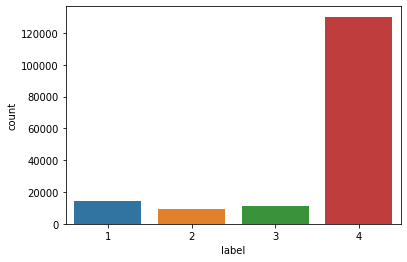

In [52]:
import seaborn as s
s.countplot(x='label',data=df4)

In [ ]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags']

In [ ]:
df4.drop(labels=feats,axis=1, inplace=True)
df4.shape

In [ ]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']

In [ ]:
df4 = df4[fs2]
df4.shape
df4.head()

**Resampling of Data-- Data Balancing**

In [58]:
#dividing our dataset into 4 parts
label1=df4[df4["label"]==str(1)]
label2=df4[df4["label"]==str(2)]
label3=df4[df4["label"]==str(3)]
label4=df4[df4["label"]==str(4)]
print(label1.shape)
print(label2.shape)
print(label3.shape)
print(label4.shape)


(14501, 11)
(9202, 11)
(10924, 11)
(130223, 11)


In [59]:
#Down Sampling
from sklearn.utils import resample
dnsample4=resample(label4,replace=True,n_samples=len(label3),random_state=46) 
label4=dnsample4
print(label4.shape)

(10924, 11)


In [60]:
data_dnsampled=pd.concat([label1,label2,label3,label4])
print(data_dnsampled["label"].value_counts())


1    14501
3    10924
4    10924
2     9202
Name: label, dtype: int64


In [61]:
type_attack = [1,2,3,4]
counts = list(data_dnsampled.value_counts())
plt.figure(figsize = (8,6))
df4=data_dnsampled
#s.barplot(x = data_dnsampled.any(), y = counts)

<Figure size 576x432 with 0 Axes>

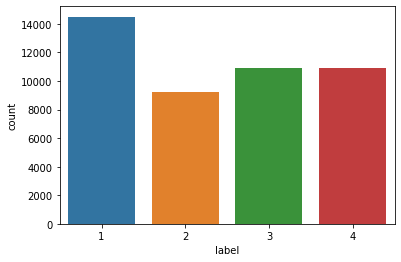

In [62]:
s.countplot(x='label',data=data_dnsampled)

In [63]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#df1['tcp.flags']= label_encoder.fit_transform(df1['tcp.flags'])
#df1['tcp.checksum']= label_encoder.fit_transform(df1['tcp.checksum'])
df4['mqtt.hdrflags']= label_encoder.fit_transform(df4['mqtt.hdrflags'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split( df4.drop(labels=['label'], axis=1), df4['label'], 
                                                                            test_size=0.3, random_state=100)

In [65]:
print(X_train.shape,X_test.shape)

(31885, 10) (13666, 10)


In [66]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)

embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)


embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [ True False False  True  True  True  True  True False False]
6 selected features
embeded_LR_features:  ['frame.time_delta', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos']


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [67]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl']
# fs2 contained selected feautures except 'tcp.time_delta', 'tcp.flags.ack' (important )
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [69]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighbors Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForest Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)


print('--------Applying AdaBoost Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)


print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression(multi_class='multinomial', max_iter=1000,solver="lbfgs")
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)


print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighbors Classifier ----------
--------Applying RandomForest Classifier ----------
--------Applying AdaBoost Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [70]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accuracy','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction,average='macro')*100,
                recall_score(y_test,  gnb_prediction,average='macro')*100,
                f1_score(y_test,  gnb_prediction,average='macro')*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction,average='weighted')*100,
                recall_score(y_test, KNN_prediction,average='weighted')*100,
                f1_score(y_test, KNN_prediction,average='weighted')*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction,average='macro')*100,
                recall_score(y_test,  RF_prediction,average='macro')*100,
                f1_score(y_test,  RF_prediction,average='macro')*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction,average='micro')*100,
                recall_score(y_test,  AB_prediction,average='micro')*100,
                f1_score(y_test,  AB_prediction,average='micro')*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction,average='micro')*100,
                recall_score(y_test,  LogR_prediction,average='micro')*100,
                f1_score(y_test,  LogR_prediction,average='micro')*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction,average='micro')*100,
                recall_score(y_test,  DT_prediction,average='micro')*100,
                f1_score(y_test,  DT_prediction,average='micro')*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'), ('NB ', 40.377579394116786, 66.86673772482418, 44.271312487906044, 36.503430357724454), ('KNN ', 86.2871359578516, 86.7570364833437, 86.2871359578516, 86.24903882073897), ('RF ', 85.5261232255232, 86.2078033737789, 85.62292555160191, 85.50953983790616), ('AB ', 53.16112981121031, 53.16112981121031, 53.16112981121031, 53.16112981121031), ('LogR ', 61.18835065125128, 61.18835065125128, 61.18835065125128, 61.18835065125128), ('DT ', 85.35050490267818, 85.35050490267818, 85.35050490267818, 85.35050490267818)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accuracy  Precision     Recall   F1-Score
2         NB   40.377579  66.866738  44.271312   36.50343
3        KNN   86.

In [71]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix AB_prediction')
print(confusion_matrix(y_test,AB_prediction))
print('Confusion Matrix LogR_prediction')
print(confusion_matrix(y_test,LogR_prediction))
print('Confusion Matrix DT_prediction')
print(confusion_matrix(y_test,DT_prediction))

Confusion Matrix gnb_prediction
[[ 449 2547    2 1329]
 [   3 2151    3  599]
 [  22 1673  586 1011]
 [   0  959    0 2332]]
Confusion Matrix KNN_prediction
[[3983   93  107  144]
 [  92 2492  117   55]
 [ 519  147 2560   66]
 [ 346  130   58 2757]]
Confusion Matrix RF_prediction
[[3802  170   78  277]
 [  81 2547   70   58]
 [ 623  169 2389  111]
 [ 118  188   35 2950]]
Confusion Matrix AB_prediction
[[2550  543  890  344]
 [  42 2481  172   61]
 [ 568  985 1471  268]
 [  99  190 2239  763]]
Confusion Matrix LogR_prediction
[[4308    0   19    0]
 [2132  621    3    0]
 [1918  236 1117   21]
 [ 975    0    0 2316]]
Confusion Matrix DT_prediction
[[3784  191   65  287]
 [  74 2550   74   58]
 [ 594  200 2368  130]
 [ 113  179   37 2962]]


**GENERATING HEAT MAPS FOR THE RANDOM FOREST MODEL**

In [72]:
cm=confusion_matrix(y_test,RF_prediction)
dt=confusion_matrix(y_test,DT_prediction)
lr=confusion_matrix(y_test,LogR_prediction)
knn=confusion_matrix(y_test,KNN_prediction)
nb=confusion_matrix(y_test,gnb_prediction)
ab=confusion_matrix(y_test,AB_prediction)


In [73]:
cmd_object=ConfusionMatrixDisplay(cm)
dt_object=ConfusionMatrixDisplay(dt)
lr_object=ConfusionMatrixDisplay(lr)
knn_object=ConfusionMatrixDisplay(knn)
nb_object=ConfusionMatrixDisplay(nb)
ab_object=ConfusionMatrixDisplay(ab)


**Confusion Matrix for Random Forest**

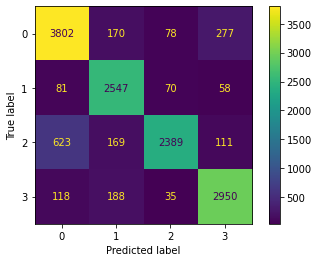

In [74]:
cmd_object.plot()

**Confusion Matrix for Decision Tree Classifier** 

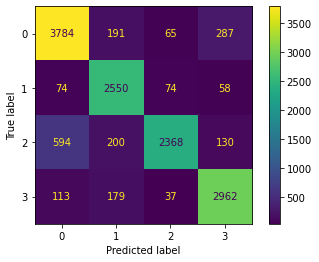

In [75]:
dt_object.plot()

**Confusion Matrix for KNN Classifier** 

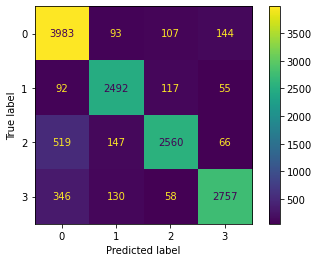

In [76]:
knn_object.plot()

**Confusion Matrix for Ada Boost Classifier** 

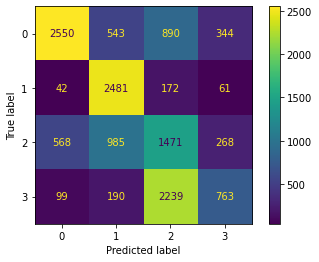

In [77]:

ab_object.plot()

**Confusion Matrix for Logistic Regression** 





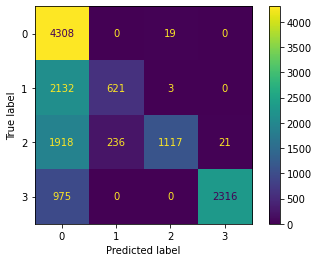

In [79]:
lr_object.plot()

**Confusion Matrix for Naive Bayes Classifier** 

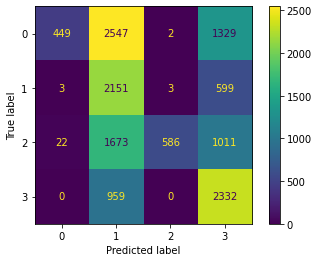

In [80]:
nb_object.plot()

In [81]:
cmd_object.ax_.set(
    title='Confusion Matrix with Labels',
    xlabel='Predicted Attacks',
    ylabel='Actual Attacks'
)

[Text(17.19999999999999, 0.5, 'Actual Attacks'),
 Text(0.5, 17.200000000000003, 'Predicted Attacks'),
 Text(0.5, 1.0, 'Confusion Matrix with Labels')]

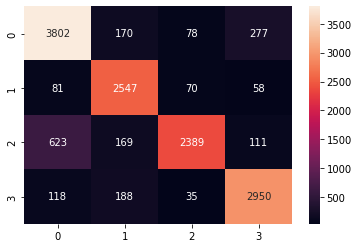

In [82]:
ax=s.heatmap(cm,annot=True,fmt='g')

In [ ]:
ax.set_title('Seaborn Confusion matrix with Labels')
ax.set_xlabel('Predicted Attack')
ax.set_ylabel('Actual Attack')
ax.xaxis.set_ticklabels(['bruteforce','slowite','malware','dos'])
ax.yaxis.set_ticklabels(['bruteforce','slowite','malware','dos'])

[Text(0, 0.5, 'bruteforce'),
 Text(0, 1.5, 'slowite'),
 Text(0, 2.5, 'malware'),
 Text(0, 3.5, 'dos')]

# Saving ML Model 

In [ ]:
"""import pickle
with open('model','wb') as f:
  pickle.dump(RF,f)"""

In [ ]:
#Recall the store model for future session
"""import pickle
with open('model.pkl','rb') as f:
  modell=pickle.load(f)"""

Method no 2

In [89]:
import pickle
pickle.dump(KNN_model, open('/content/ICUDatasetProcessed/newmodel.pkl','wb'))

In [90]:
model = pickle.load(open('/content/ICUDatasetProcessed/newmodel.pkl','rb'))

In [ ]:

to_predict_list='/content/ICUDatasetProcessed/attack.csv'
to_predict=np.array(to_predict_list).reshape(-1,1)


In [31]:
df6=pd.read_csv('/content/ICUDatasetProcessed/Attack.csv',index_col=0, low_memory=False)
prediction=np.array(df6).reshape(1,-1)

In [88]:
model.predict(X_test)

array(['1', '2', '2', ..., '3', '3', '3'], dtype=object)

In [84]:
DT.predict(X_test)

array(['1', '2', '2', ..., '3', '3', '3'], dtype=object)